# Import libraries, functions and classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from classes import parameters, moments, var
from data_funcs import load, get_path

# Set up plots characteristics for consistency across figures

In [13]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (16,11)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['font.size'] = 15

In [3]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',


# Load run and data

In [4]:
baseline = '401'
variation = '4.2'
data_path = 'data/'
results_path = 'calibration_results_matched_economy/'

run_path = get_path(baseline,variation,results_path)
p, m, sol = load(run_path,data_path, context = 'calibration')

# Define better names for countries, get quick rundown of the run

In [5]:
countries_names = {'USA':'USA','EUR':'Europe','JAP':'Japan','CHN':'China',
                   'BRA':'Brazil','IND':'India','ROW':'Rest of the world'}
print('Parameters used for calibration : ', p.calib_parameters)
print('Moments targeted in calibration : ')
for mom in m.list_of_moments:
    print(mom, m.description.loc[mom,'description'])

Parameters used for calibration :  ['eta', 'k', 'fe', 'T', 'zeta', 'g_0', 'delta', 'nu', 'fo']
Moments targeted in calibration : 
GPDIFF Difference between sectors price index growth rate
GROWTH Growth rate
KM Kogan Moment
OUT Total world output
RD RD expenditures to GDP ratio 
RP Relative prices 
SRDUS Share of sector 1 produced by firms performing R&D in the US 
SRGDP Share of world real GDP 
SINNOVPATUS  Share of innovations patented in the US
TO  Turnover
SPFLOW Ratio of international bilateral patent flows to international world patenting
DOMPATUS  domestic patent US as share of patents from US
DOMPATEU  domestic patent EU as share of patents from EU
UUPCOST Patenting cost in US for the US
SINNOVPATEU  Share of innovations patented in Europe
DOMPATINEU  domestic patent EU as share of EU patents
DOMPATINUS  domestic patent US as share of US patents


# Plot moment matching

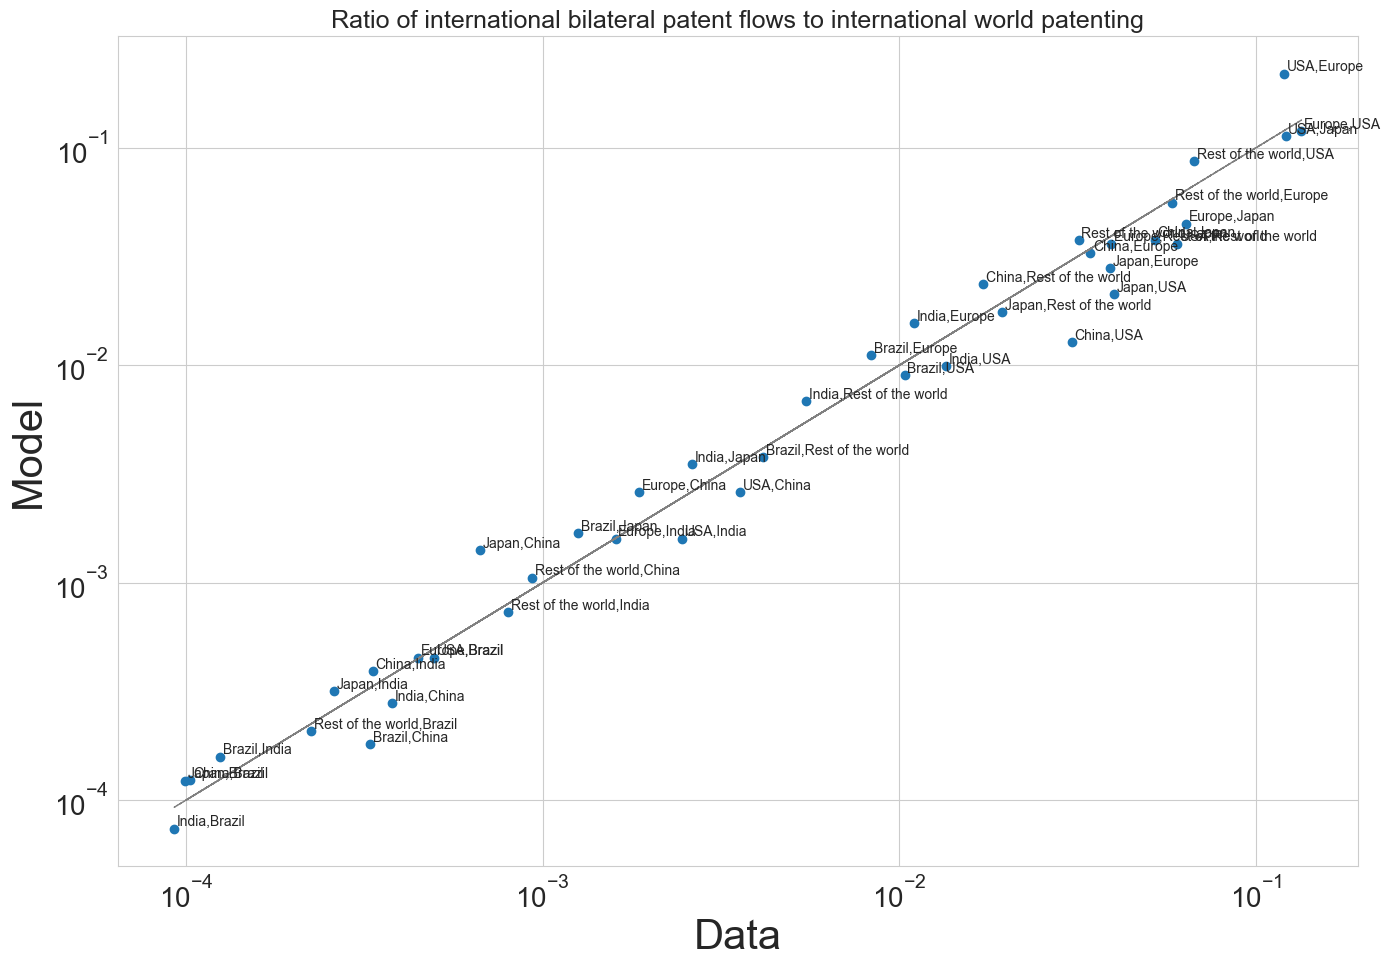

In [26]:
moment = 'SPFLOW'
annotate_with_labels = True
replace_country_codes_with_labels = True

x = getattr(m, moment+'_target').ravel()
y = getattr(m, moment).ravel()

labels = m.idx[moment].to_series().agg(','.join).astype('str')
if replace_country_codes_with_labels:
    for code, name in countries_names.items():
        labels = labels.str.replace(code,name)

fig, ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x,x,color='grey',ls='--',lw=1)
if annotate_with_labels:
    texts = [ax.annotate(label,
                         xy=(x[i],y[i]),
                         xytext=(2,2),
                         textcoords='offset points',
                         fontsize = 10
                        ) 
             for i,label in enumerate(labels)]
plt.xlabel('Data')
plt.ylabel('Model')
plt.title(m.description.loc[moment,'description'])
plt.xscale('log')
plt.yscale('log')

plt.show()

In [27]:
for i,label in enumerate(m.idx[moment].map(countries_names)):
    print(label)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
